In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
train = pd.read_csv('train.csv')
train.info()
train = np.array(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
x_train = train[:,1:]
y_train = train[:,0]

In [4]:
x_train[0].shape

(784,)

In [5]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [6]:
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)

In [8]:
x_trainr = np.array(x_train).reshape(42000,28,28,1)
x_trainr.shape

(42000, 28, 28, 1)

In [9]:
INPUT_SHAPE = (28,28,1)
model = Sequential()

#first layer 
model.add(Conv2D(64, (3,3),activation = 'relu', input_shape = INPUT_SHAPE))
model.add(MaxPooling2D(pool_size = (2,2)))

#second layer
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#third layer 
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#neural network
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [10]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [11]:
model.fit(x_trainr, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.4360 - accuracy: 0.8601 - val_loss: 0.1546 - val_accuracy: 0.9527
Epoch 2/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.1361 - accuracy: 0.9580 - val_loss: 0.1114 - val_accuracy: 0.9646
Epoch 3/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0983 - accuracy: 0.9703 - val_loss: 0.0955 - val_accuracy: 0.9702
Epoch 4/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0791 - accuracy: 0.9752 - val_loss: 0.0763 - val_accuracy: 0.9761
Epoch 5/10
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0652 - accuracy: 0.9793 - val_loss: 0.0623 - val_accuracy: 0.9807
Epoch 6/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0530 - accuracy: 0.9828 - val_loss: 0.0679 - val_accuracy: 0.9787
Epoch 7/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0449 - accuracy: 0.9852 - val_loss: 0.0709 -

In [12]:
test = pd.read_csv('test.csv')
x_test = np.array(test)
lenth = len(x_test)
x_test = tf.convert_to_tensor(x_test)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
x_testr = np.array(x_test).reshape(lenth,28,28,1)

In [13]:
predictions = model.predict(x_testr)

875/875 [==============================] - 8s 9ms/step


2


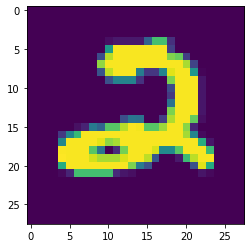

In [14]:
plt.imshow(x_testr[0])
print(np.argmax(predictions[0]))

In [15]:
final = np.argmax(predictions, axis  = 1)

In [16]:
test_label = pd.DataFrame(final, columns = ['Label'])
test_label.index.name = 'ImageId'
test_label.index += 1 

In [17]:
test_label.to_csv('submission.csv')